<a href="https://colab.research.google.com/github/Niroth36/Machine_Learning_Project/blob/main/it21395first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries we need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import glob
import seaborn as sns

Importing dataset (.csv file)

In [7]:
url = "https://raw.githubusercontent.com/Niroth36/Machine_Learning_Project/main/fetal_health.csv"
dataset = pd.read_csv(url)
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
# dataset.shape
dataset.shape

(2126, 22)

In [ ]:
print(X)

[[1.20e+02 0.00e+00 0.00e+00 ... 1.21e+02 7.30e+01 1.00e+00]
 [1.32e+02 6.00e-03 0.00e+00 ... 1.40e+02 1.20e+01 0.00e+00]
 [1.33e+02 3.00e-03 0.00e+00 ... 1.38e+02 1.30e+01 0.00e+00]
 ...
 [1.40e+02 1.00e-03 0.00e+00 ... 1.52e+02 4.00e+00 1.00e+00]
 [1.40e+02 1.00e-03 0.00e+00 ... 1.51e+02 4.00e+00 1.00e+00]
 [1.42e+02 2.00e-03 2.00e-03 ... 1.45e+02 1.00e+00 0.00e+00]]


In [ ]:
print(y)

[2. 1. 1. ... 2. 2. 1.]


Checking data (5 first lines)

In [ ]:
dataset.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Checking data type of dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
dataset.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


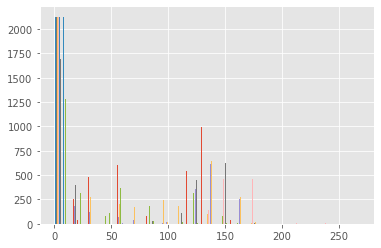

In [ ]:
plt.style.use('ggplot')
plt.hist(x, bins=21)
plt.show()

Checking if there are null values in the dataset

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

baseline value                                            0
accelerations                                             0
histogram_tendency                                        0
histogram_variance                                        0
histogram_median                                          0
histogram_mean                                            0
histogram_mode                                            0
histogram_number_of_zeroes                                0
histogram_number_of_peaks                                 0
histogram_max                                             0
histogram_min                                             0
histogram_width                                           0
mean_value_of_long_term_variability                       0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_short_term_variability                      0
abnormal_short_term_variability                           0
prolongued_decelerations                

In [ ]:
hist_list_fh = [s for s in dataset.columns if s.startswith('histogram') or s.startswith('fetal_health')]
cat_list_fh = [s for s in dataset.columns if s not in hist_list_fh or s.startswith('fetal_health')]
chart_1 = [hist_list_fh[i] for i in [5, 6, 7, 8, 9, 10]]
chart_2 = [hist_list_fh[i] for i in [0, 1, 2, 3, 4, 5, 10]]
chart_3 = [cat_list_fh[i] for i in [0, 1, 2, 3, 4, 5, 6, 11]]
chart_4 = [cat_list_fh[i] for i in [6, 7, 8, 9, 10, 11]]

<Figure size 2520x2520 with 0 Axes>

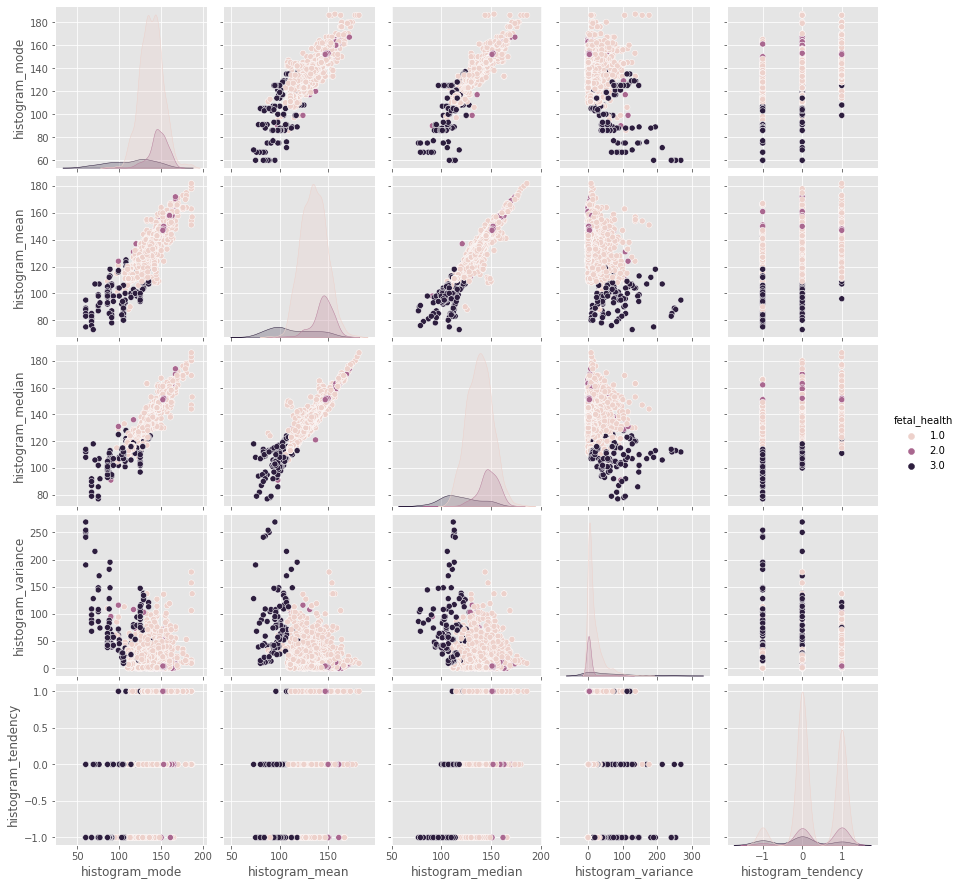

In [ ]:
plt.figure(figsize=(35, 35))

sns.pairplot(dataset[chart_1], hue='fetal_health')

plt.show()

<Figure size 2520x2520 with 0 Axes>

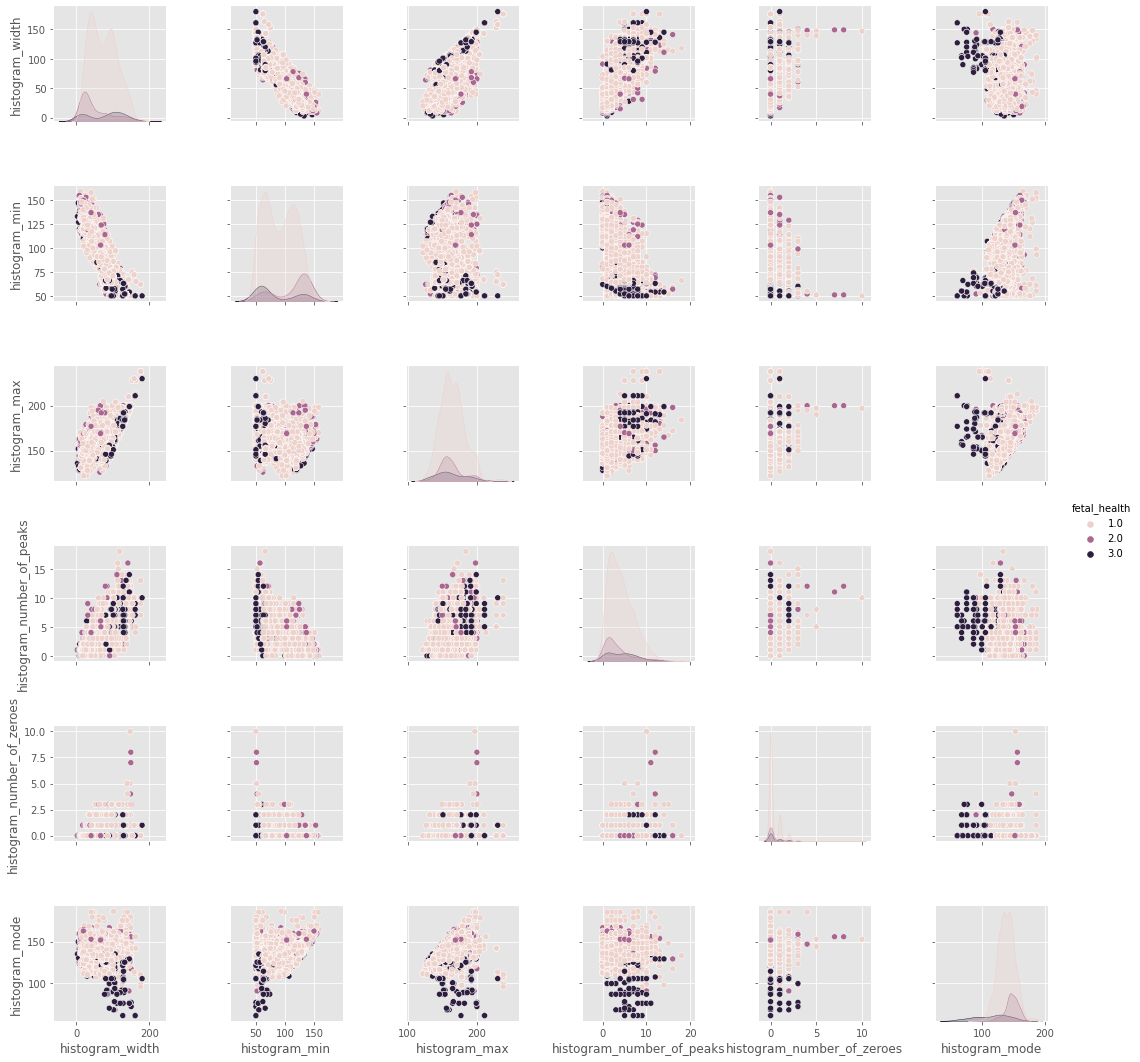

In [ ]:
plt.figure(figsize=(35, 35))

sns.pairplot(dataset[chart_2], hue='fetal_health')

plt.show()

<Figure size 2520x2520 with 0 Axes>

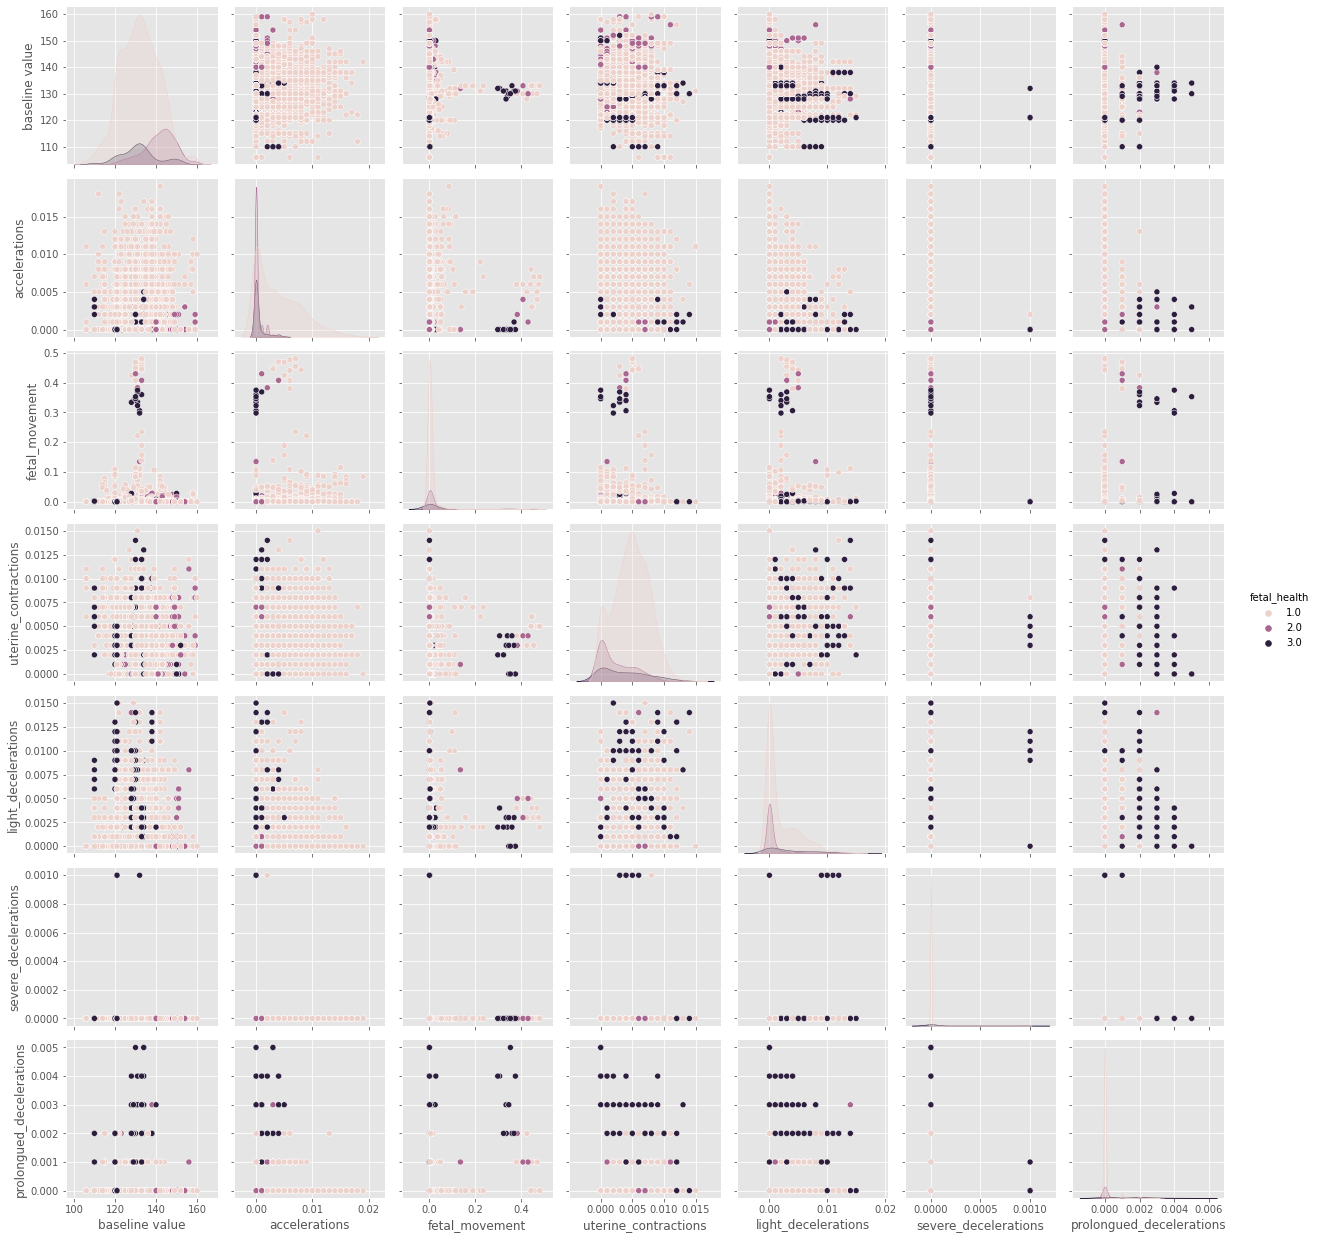

In [ ]:
plt.figure(figsize=(35, 35))

sns.pairplot(dataset[chart_3], hue='fetal_health')

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2520x2520 with 0 Axes>

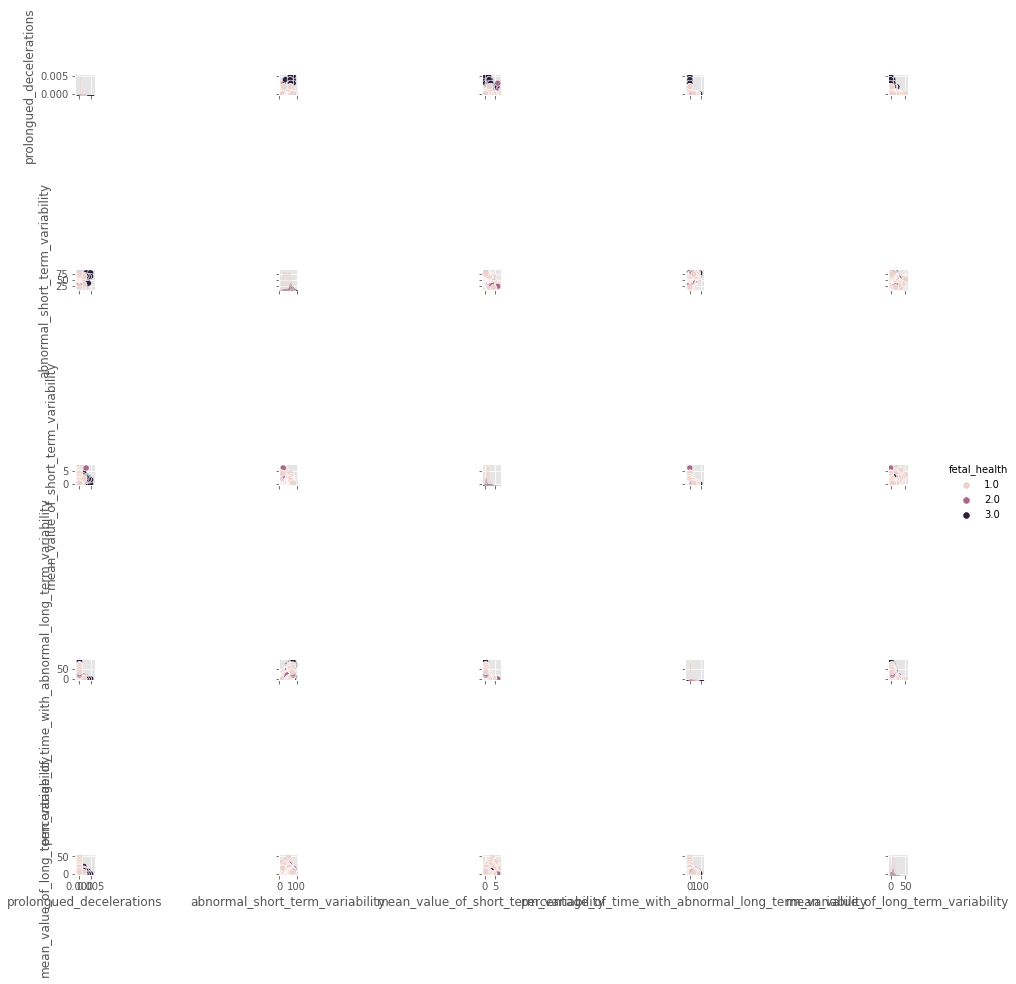

In [ ]:
plt.figure(figsize=(35, 35))

sns.pairplot(dataset[chart_4], hue='fetal_health')

plt.show()